<a href="https://colab.research.google.com/github/tobiasMs/Pemrograman_Python/blob/main/Pertemuan11Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

 09-28-2020-15.55.45.pdf
 10-12-2020-15.39.15.pdf
'10-12-2020-15.41.57(1).pdf'
'1101194272 Registrasi _ Telkom University.pdf'
'1101194272_Tobias Mikha S.pdf'
'1101194272_Tobias Mikha Sulistiyo.pdf'
'17_Tobias Mikha S(1).pdf'
'17_Tobias Mikha S.pdf'
'17_Tobias Mikha Sulistiyo(2).pdf'
'17_Tobias Mikha Sulistiyo(3).pdf'
 aiu/
 best_weight_scene_mobileNet.h5
 Classroom/
'Colab Notebooks'/
'Getting started.pdf'
'Kuis PDA 1_Tobias Mikha S_1101194272.pdf'
 laut.jpg
 nnmodel_scene/
'Tobias Mikha S-1101194272-Uraian.pdf'
'Tobias Mikha Sulistiyo_1101194272_17 (1).pdf'
'Tobias Mikha Sulistiyo_1101194272_17(1).pdf'
'Tobias Mikha Sulistiyo_1101194272_17.pdf'
'Tobias Mikha Sulistiyo_1101194272_UTS pda.pdf'
'WhatsApp Image 2020-09-11 at 6.48.32 PM.jpeg'
'WhatsApp Image 2020-10-12 at 3.48.39 PM.jpeg'
'WhatsApp Image 2020-11-09 at 3.39.51 PM.jpeg'
'WhatsApp Image 2020-11-09 at 3.43.45 PM.jpeg'
'WhatsApp Image 2020-11-09 at 3.50.05 PM.jpeg'
'WhatsApp Image 2020-11-23 at 4.19.24 PM.jpeg'
'WhatsApp Image

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
print("[INFO] loading images...")
imagePaths = paths.list_images("aiu")
data = []
labels = []

[INFO] loading images...


In [ ]:
for imagePath in imagePaths:

	  image = Image.open(imagePath)
	  image = np.array(image.resize((64, 64))) / 255.0
	  data.append(image)


	  label = imagePath.split(os.path.sep)[-2]
	  labels.append(label)

In [ ]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(536, 64, 64, 3)
(179, 64, 64, 3)


In [ ]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [ ]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
17/17 [==============================] - 1s 74ms/step - loss: 1.0840 - accuracy: 0.5840 - val_loss: 0.5615 - val_accuracy: 0.8268
Epoch 2/25
17/17 [==============================] - 1s 66ms/step - loss: 0.5183 - accuracy: 0.8713 - val_loss: 0.3399 - val_accuracy: 0.8939
Epoch 3/25
17/17 [==============================] - 1s 66ms/step - loss: 0.3714 - accuracy: 0.8787 - val_loss: 0.3532 - val_accuracy: 0.8883
Epoch 4/25
17/17 [==============================] - 1s 67ms/step - loss: 0.2813 - accuracy: 0.9086 - val_loss: 0.3765 - val_accuracy: 0.8771
Epoch 5/25
17/17 [==============================] - 1s 68ms/step - loss: 0.2454 - accuracy: 0.9328 - val_loss: 0.2813 - val_accuracy: 0.8994
Epoch 6/25
17/17 [==============================] - 1s 67ms/step - loss: 0.2210 - accuracy: 0.9366 - val_loss: 0.2490 - val_accuracy: 0.9162
Epoch 7/25
17/17 [==============================] - 1s 67ms/step - loss: 0.1817 - accuracy: 0.9459 - val_loss: 0.2315 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


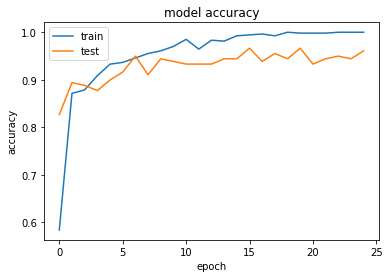

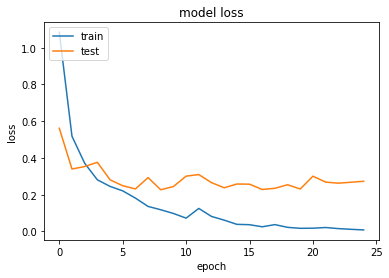

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.96      0.93      0.95        29
      GMB_02       0.97      1.00      0.99       103
      GMB_03       0.91      0.87      0.89        23
      GMB_09       0.96      1.00      0.98        22
      GMB_10       0.00      0.00      0.00         2

    accuracy                           0.96       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.95      0.96      0.96       179



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


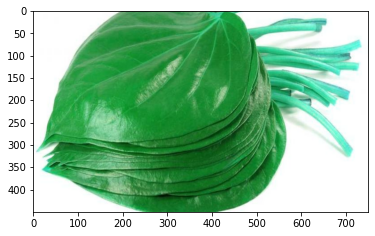

In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='daun-sirih.jpg'
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [ ]:
image_testing = Image.open('daun-sirih.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [ ]:

image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [ ]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.8315501e-01 1.1429650e-02 8.6871245e-05 1.8582588e-05 5.3097662e-03]]
['GMB_01']
